# K-Nearest Neighbors

## 1. Importación de librerías, establecimiento de directorio de trabajo y carga de datos

In [1]:
# librerías básicas 
import os
import pandas as pd  
import numpy as np  
import warnings  
warnings.filterwarnings('ignore')
  
# para la construcción del modelo 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# para guardar el modelo
import pickle
  
# para visualización
import seaborn as sns  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline  

os.chdir("C:/Users/aleja/OneDrive - Universidad Politécnica de Madrid/Universidad/Asignaturas/Cuarto/Trabajo de Fin de Grado")

In [2]:
accesos = pd.read_csv("Resultados/Accesos_Calidad_Vida.csv", index_col="Unnamed: 0")
accesos.head()

,latitud,longitud,edad,calidad_vida
0,41.621468,2.068474,11,52.885748
1,41.600270,2.085002,12,74.793875
2,41.616524,2.089927,12,79.858657
3,41.618820,2.089480,11,79.858657
4,41.618908,2.089475,12,79.858657


## 2. Construcción de la matriz de características (X) y el vector variable dependiente (y)

In [3]:
X = accesos.iloc[:, :-1].values
y = accesos.iloc[:, -1].values

## 3. División del dataset en set de entrenamiento y de test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 4. Feature scaling of X (rango: -3 a 3)

In [5]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Construcción y entrenamiento del modelo de regresión sobre el set de entrenamiento

In [19]:
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto', p=2, metric='minkowski')
regressor.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

## 6. Predicción de resultados del set de test

In [20]:
y_pred = regressor.predict(X_test)

## 7.  Métricas de rendimiento

In [21]:
# R2score
print('R2score:', r2_score(y_test, y_pred))

# Mean Absolute Error
print('MAE: \t', mean_absolute_error(y_test, y_pred))

# Mean Squared Error
print('MSE: \t', mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

R2score: 0.9957632924772584
MAE: 	 0.30291434253493743
MSE: 	 1.7347188431222063
RMSE:  1.3170872572165468


### 7.1. Para ganar más intuición

In [26]:
np.set_printoptions(precision=2) # redondea a dos decimales

print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

# concatenamos el set predicho y el de test, así podemos ver mejor las diferencias entre los dos

[[34.51 34.51]
 [79.86 79.86]
 [79.86 79.86]
 ...
 [65.14 65.14]
 [79.86 79.86]
 [79.86 79.86]]


### 7.2 Más métricas de rendimiento

In [28]:
from sklearn.model_selection import cross_val_score # cross validation

accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)

print("Media: {:.4f}".format(accuracies.mean()))
print("Desviación estándar: {:.4f}".format(accuracies.std()))

Media: 0.9953
Desviación estándar: 0.0007


Vemos que la precision y los errores no son muy buenos, por lo que probaremos otros parámetros para ver si ofrece alguno más óptimo
### 7.3 Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

parameters = {
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_search = GridSearchCV(estimator = regressor,
                           param_grid = parameters,
                           scoring = 'r2',
                           cv = cv,
                           n_jobs = -1)

grid_search.fit(X_train, y_train)

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best r2: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\aleja\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.99530333 0.99518678 0.99530086 0.99518749        nan        nan]
  warnings.warn(


Best r2: 99.53 %


NameError: name 'accuracies' is not defined

In [16]:
regressor = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='ball_tree', p=1, metric='minkowski')
regressor.fit(X_train, y_train) # entrenamos el modelo con los datasets de entrenamiento

KNeighborsRegressor(algorithm='ball_tree', p=1, weights='distance')

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R2score
print('R2score:', r2_score(y_test, y_pred))

# Mean Absolute Error
print('MAE: \t', mean_absolute_error(y_test, y_pred))

# Mean Squared Error
print('MSE: \t', mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
print("RMSE: ", mean_squared_error(y_test, y_pred, squared=False))

R2score: 0.9956916067466457
MAE: 	 0.3038037487122305
MSE: 	 1.7640705477204885
RMSE:  1.3281831755147664


## 8. Guardar el mejor modelo

In [24]:
import pickle

# save
with open('Modelos/KNN.pkl', 'wb') as f:
    pickle.dump(regressor, f)

## 9. Ejemplo de predicción

In [12]:
print(regressor.predict(sc.transform([['425060.955125', '4.606138e+06', '22']]))) 

[79.86]


Text(0.5, 0.98, 'Multi-Linear Regression Model Visualization (R2 = -6320217.427795819)')

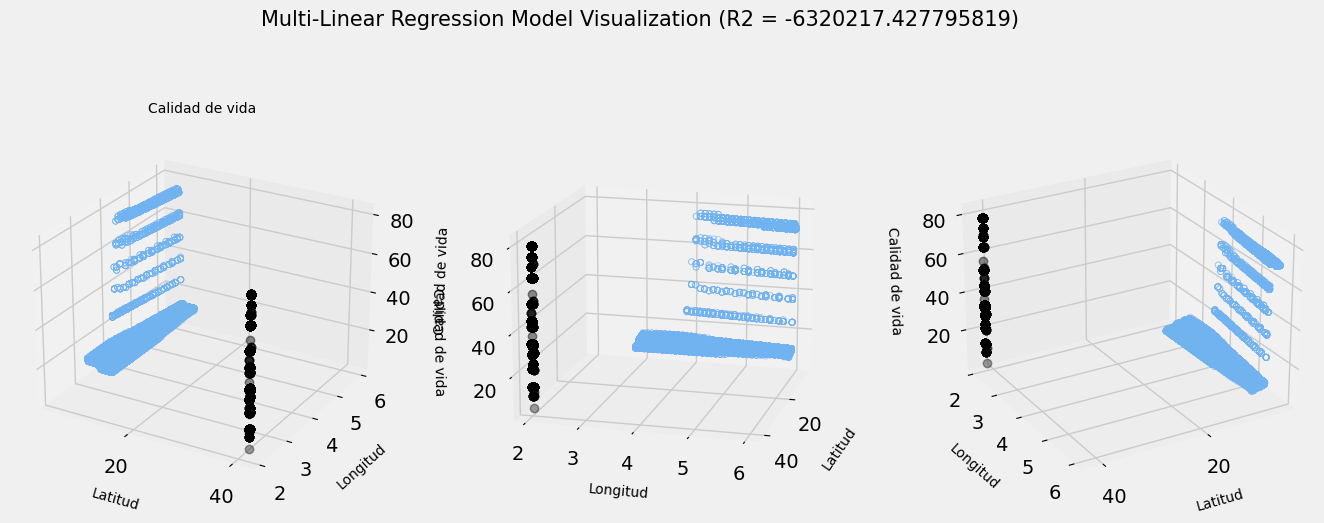

In [30]:
# Plotting a 3-D plot for visualizing the Multiple Linear Regression Model  
  
# Preparing the data  
independent = habitantes[['latitud', 'longitud']].values.reshape(-1,2)  
dependent = habitantes['calidad_vida']  
  
# Creating a variable for each dimension  
x = independent[:, 0]  
y = independent[:, 1]  
z = dependent  
  
x_range = np.linspace(5, 10, 35)    
y_range = np.linspace(3, 6, 35)   
x1_range = np.linspace(3, 6, 35)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)  
viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T  
  
# Predicting price values using the linear regression model built above  
predictions = regressor.predict(viz)  
  
# Evaluating the model using the R2 square of the model  
r2 = regressor.score(X, y)  
  
# Ploting the model for visualization  
plt.style.use('fivethirtyeight')  
  
# Initializing a matplotlib figure  
fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]  

axis1.set_title('Calidad de vida', fontsize = 10)  

for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'o', alpha = 0.1)  
    ax.scatter(x_range.flatten(), y_range.flatten(), predictions, facecolor = (0,0,0,0), s = 20, edgecolor = '#70b3f0')  
    ax.set_xlabel('Latitud', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('Longitud', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('Calidad de vida', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')  
  
axis1.view_init(elev=25, azim=-60)  
axis2.view_init(elev=15, azim=15)  
axis3.view_init(elev=25, azim=60)  
  
fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  